# Author: Kedar Nandargi. 
## Task 1: Prediction using Supervised ML GRIP @ The Spark Foundation


### I have used Linear Regression Model
### There are two features given in dataset. Using Hours feature we have to predict the Scores of the Student

# 📈 Linear Regression with Python

# 📤 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

# 💾 Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## 💾 Check out the Data

In [3]:
print("Data")

df

Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 📊 Exploratory Data Analysis (EDA)

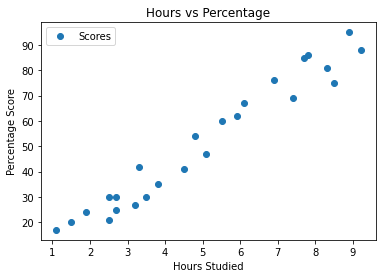

In [4]:
# Plotting the distribution of scores
# plt.figure(figsize=(10, 8))
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Scores column. 

## X and y arrays

In [5]:
X = df[['Hours']]
y= df['Scores']

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

# ✔️ Linear Regression

In [7]:

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

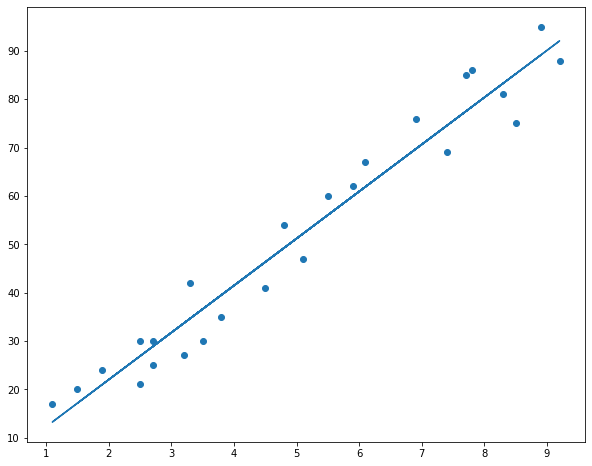

In [8]:
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [9]:
print(X_test) 
y_pred = lr.predict(X_test)

    Hours
16    2.5
10    7.7
22    3.8
19    7.4
7     5.5


## ✔️ Model Evaluation

In [10]:
list(zip(y_test, y_pred)) # Actucal vs Predictions

[(30, 26.84539693128752),
 (85, 77.4585936078598),
 (35, 39.498696100430585),
 (69, 74.5386014919037),
 (60, 56.04531809084845)]

## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [15]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


In [12]:
print_evaluate(y_test, y_pred)

MAE: 4.937597792467705
MSE: 26.675642597052235
RMSE: 5.164846812544612
R2 Square 0.9377551740781869
__________________________________


In [13]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,4.937598,26.675643,5.164847,0.937755,0.615166


## ✔️ Model Evaluation using Custom Input

In [14]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.5452195402996
